# **Capitulo 4**

In [1]:
import pandas as pd #importamos librería de pandas
import numpy as np  #importamos librería de numpy

In [2]:
hurtos = pd.read_json('https://www.datos.gov.co/resource/4rxi-8m8d.json?$limit=1000000') #sincronizamos el archivo robos.csv de nuestro drive
hurtos  #mostramos el Dataframe Hurtos

,fecha_hecho,cod_depto,departamento,cod_muni,municipio,cantidad
0,2003-01-01T00:00:00.000,5,ANTIOQUIA,5002,ABEJORRAL,1
1,2003-01-01T00:00:00.000,5,ANTIOQUIA,5154,CAUCASIA,1
2,2003-01-01T00:00:00.000,5,ANTIOQUIA,5001,MEDELLIN,2
3,2003-01-01T00:00:00.000,5,ANTIOQUIA,5585,PUERTO NARE,1
4,2003-01-01T00:00:00.000,8,ATLANTICO,8001,BARRANQUILLA,4
...,...,...,...,...,...,...
595541,2024-09-30T00:00:00.000,76,VALLE DEL CAUCA,76109,BUENAVENTURA,2
595542,2024-09-30T00:00:00.000,76,VALLE DEL CAUCA,76520,PALMIRA,3
595543,2024-09-30T00:00:00.000,76,VALLE DEL CAUCA,76233,DAGUA,1
595544,2024-09-30T00:00:00.000,76,VALLE DEL CAUCA,76248,EL CERRITO,1


In [3]:
hurtos.shape #muestra las dimensiones del DataFrame

(595546, 6)

In [4]:
hurtos.columns #muestra las columnas del DataFrame

Index(['fecha_hecho', 'cod_depto', 'departamento', 'cod_muni', 'municipio',
       'cantidad'],
      dtype='object')

In [5]:
hurtos["departamento"].unique() #muestra los valores únicos de la columna Departamento

array(['ANTIOQUIA', 'ATLANTICO', 'BOLIVAR', 'CALDAS', 'CASANARE', 'CAUCA',
       'CHOCO', 'BOGOTA D.C.', 'CUNDINAMARCA', 'HUILA', 'META',
       'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SAN ANDRES ISLAS',
       'SANTANDER', 'SUCRE', 'TOLIMA', 'CORDOBA', 'VALLE DEL CAUCA',
       'BOYACA', 'MAGDALENA', 'NARIÑO', 'NORTE DE SANTANDER',
       'LA GUAJIRA', 'CESAR', 'CAQUETA', 'AMAZONAS', 'GUAINIA', 'VICHADA',
       'ARAUCA', 'VAUPES', 'GUAVIARE'], dtype=object)

In [6]:
hurtos["cantidad"].count()  #devuelve el número total de observaciones no nulas.

595546

In [7]:
hurtos["cantidad"].sum()  #Realiza la suma de la columna Cantidad

3236463

In [8]:
hurtos["cantidad"].min()  #Devuelve el valor mínimo

1

In [9]:
hurtos["cantidad"].max()  #Devuelve el valor máximo

718

In [10]:
hurtos["cantidad"].mean()  #Devuelve la media aritmética

5.434446709406158

In [11]:
hurtos["cantidad"].median()  #Devuelve la mediana

1.0

In [12]:
hurtos["cantidad"].mode()  #Devuelve la moda

,cantidad
0,1


In [13]:
hurtos["cantidad"].quantile([0,0.25,0.5,0.75,1])  #calcula los percentiles especificados, incluyendo los cuartiles.

,cantidad
0.00,1.0
0.25,1.0
0.50,1.0
0.75,3.0
1.00,718.0


In [14]:
hurtos.describe() #Realiza un análisis descriptivo estadístico de los datos

,cod_depto,cod_muni,cantidad
count,595546.000000,595546.000000,595546.000000
mean,40.653696,40952.914437,5.434447
std,26.783278,26763.571449,24.654525
min,5.000000,5001.000000,1.000000
25%,17.000000,17013.000000,1.000000
50%,41.000000,41001.000000,1.000000
75%,68.000000,68276.000000,3.000000
max,99.000000,99773.000000,718.000000


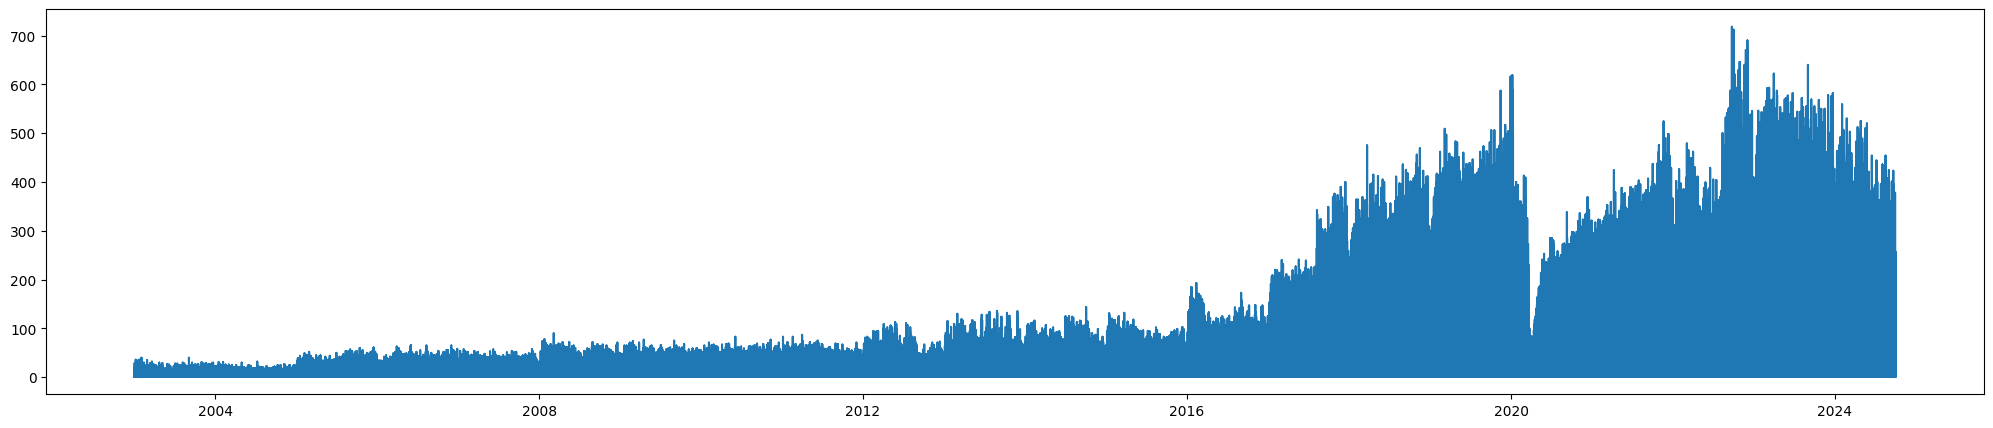

In [15]:
import matplotlib.pyplot as plt #invocamos la librería para realizar una gráfica
hurtos['fecha_hecho'] = pd.to_datetime(hurtos['fecha_hecho']) #realiza la conversión de datos a fecha y sobreescribe en la columna
plt.figure(figsize=(25, 5))                           #Indica el tamaño de la figura
plt.plot(hurtos["fecha_hecho"],hurtos["cantidad"])    #Grafica fecha del hurto en el eje X y cantidad en el eje Y

In [16]:
hurtos["departamento"].value_counts() # Realiza un conteo de la frecuencia de cada valor en la columna "DEPARTAMENTO".

,count
departamento,
CUNDINAMARCA,66192
ANTIOQUIA,64588
VALLE DEL CAUCA,58628
SANTANDER,44361
TOLIMA,27478
BOYACA,25605
ATLANTICO,24830
HUILA,24469
CALDAS,18945


In [17]:
group = hurtos.groupby('departamento')['cantidad'].sum().reset_index()
group

,departamento,cantidad
0,AMAZONAS,1737
1,ANTIOQUIA,349523
2,ARAUCA,4989
3,ATLANTICO,173174
4,BOGOTA D.C.,1154430
5,BOLIVAR,76081
6,BOYACA,44109
7,CALDAS,49273
8,CAQUETA,18555
9,CASANARE,19076


[]

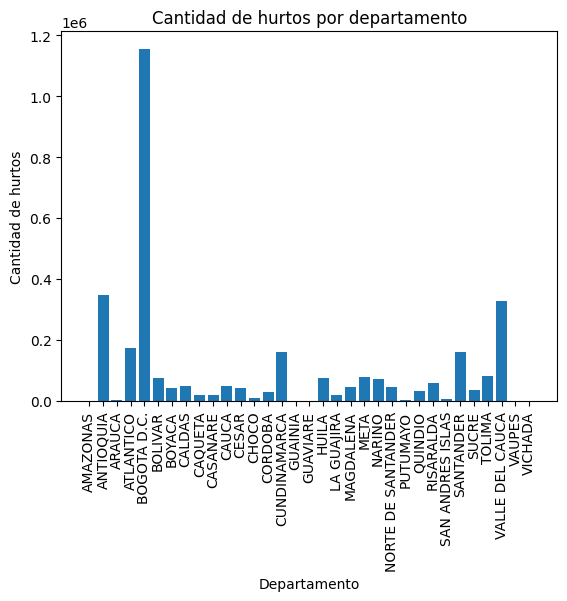

In [18]:
plt.bar(group["departamento"],group["cantidad"])
plt.title("Cantidad de hurtos por departamento")
plt.xlabel("Departamento")
plt.xticks(rotation=90)
plt.ylabel("Cantidad de hurtos")
plt.plot()

[]

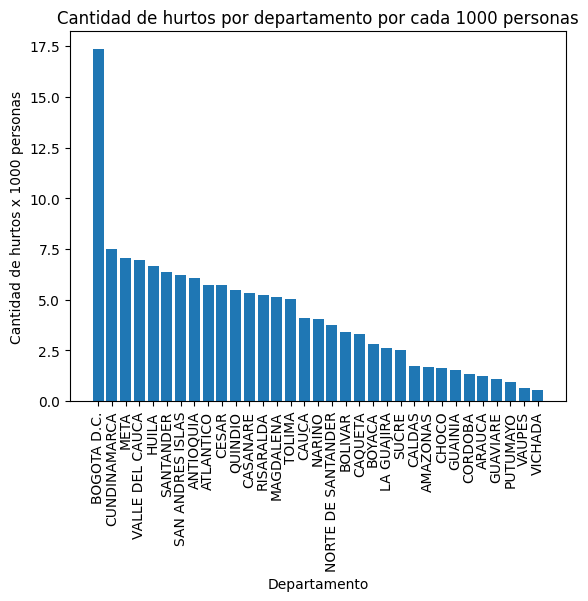

In [20]:
Filtro_2022 = hurtos[(hurtos['fecha_hecho'] >= '2022-01-01') & (hurtos['fecha_hecho'] <= '2022-12-31' )] #Se crea un filtro para extraer los datos del año 2022
Departamentos = Filtro_2022.groupby('departamento').sum(numeric_only=True).reset_index() #Se filtra por departamentos
poblacion = pd.DataFrame(
    {
        'departamento': ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA D.C.', 'BOLIVAR', 'BOYACA', 'CORDOBA', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CUNDINAMARCA', 'GUAINIA', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SAN ANDRES ISLAS', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPES', 'VICHADA'],
        'poblacion_2022': [83808, 6890000, 280000, 2835509, 7900000, 2210000, 1290000, 1820000, 990000, 430000, 440000, 1290000, 920000, 530000, 3140000, 50000, 80000, 1180000, 880000, 1170000, 1000000, 1880000, 1160000, 360000, 570000, 1010000, 60000, 2250000, 930000, 1590000, 4650000, 40000, 100000]
}) #Se crea un dataframe de población
Departamentos = pd.merge(Departamentos, poblacion, on='departamento', how='left') #Se unen los dataframe
Departamentos['tasa'] = (Departamentos['cantidad'] / Departamentos['poblacion_2022']) * 1000 #Se calcula la tasa de robos por cada 1000 habitantes
Departamentos=Departamentos.sort_values(by="tasa",ascending=False) #Se organiza la columna tasa de mayor a menor
plt.bar(Departamentos["departamento"],Departamentos["tasa"])
plt.title("Cantidad de hurtos por departamento por cada 1000 personas")
plt.xlabel("Departamento")
plt.xticks(rotation=90)
plt.ylabel("Cantidad de hurtos x 1000 personas")
plt.plot()


In [21]:
hurtos_2022 = hurtos.query("fecha_hecho >= '2022-01-01' and fecha_hecho <= '2022-12-31'")
hurtos_2022

,fecha_hecho,cod_depto,departamento,cod_muni,municipio,cantidad
470070,2022-01-01,5,ANTIOQUIA,5031,AMALFI,1
470071,2022-01-01,5,ANTIOQUIA,5034,ANDES,1
470072,2022-01-01,5,ANTIOQUIA,5088,BELLO,2
470073,2022-01-01,5,ANTIOQUIA,5120,CACERES,1
470074,2022-01-01,5,ANTIOQUIA,5129,CALDAS,2
...,...,...,...,...,...,...
515686,2022-12-31,76,VALLE DEL CAUCA,76318,GUACARI,1
515687,2022-12-31,76,VALLE DEL CAUCA,76520,PALMIRA,10
515688,2022-12-31,76,VALLE DEL CAUCA,76563,PRADERA,2
515689,2022-12-31,76,VALLE DEL CAUCA,76834,TULUA,3


In [23]:
hurtos_2022_medellin = hurtos.query("fecha_hecho >= '2022-01-01' and fecha_hecho <= '2022-12-31' and municipio == 'MEDELLIN'").sort_values("fecha_hecho")
hurtos_2022_medellin

,fecha_hecho,cod_depto,departamento,cod_muni,municipio,cantidad
470081,2022-01-01,5,ANTIOQUIA,5001,MEDELLIN,28
470217,2022-01-02,5,ANTIOQUIA,5001,MEDELLIN,27
470329,2022-01-03,5,ANTIOQUIA,5001,MEDELLIN,49
470423,2022-01-04,5,ANTIOQUIA,5001,MEDELLIN,62
470541,2022-01-05,5,ANTIOQUIA,5001,MEDELLIN,84
...,...,...,...,...,...,...
515046,2022-12-27,5,ANTIOQUIA,5001,MEDELLIN,68
515175,2022-12-28,5,ANTIOQUIA,5001,MEDELLIN,76
515305,2022-12-29,5,ANTIOQUIA,5001,MEDELLIN,69
515443,2022-12-30,5,ANTIOQUIA,5001,MEDELLIN,86


In [24]:
hurtos_2022_manizales = hurtos.query("fecha_hecho >= '2022-01-01' and fecha_hecho <= '2022-12-31' and municipio == 'MANIZALES'").sort_values("fecha_hecho")
hurtos_2022_manizales

,fecha_hecho,cod_depto,departamento,cod_muni,municipio,cantidad
470101,2022-01-01,17,CALDAS,17001,MANIZALES,2
470240,2022-01-02,17,CALDAS,17001,MANIZALES,2
470343,2022-01-03,17,CALDAS,17001,MANIZALES,5
470440,2022-01-04,17,CALDAS,17001,MANIZALES,3
470564,2022-01-05,17,CALDAS,17001,MANIZALES,3
...,...,...,...,...,...,...
515066,2022-12-27,17,CALDAS,17001,MANIZALES,4
515201,2022-12-28,17,CALDAS,17001,MANIZALES,5
515330,2022-12-29,17,CALDAS,17001,MANIZALES,1
515460,2022-12-30,17,CALDAS,17001,MANIZALES,1


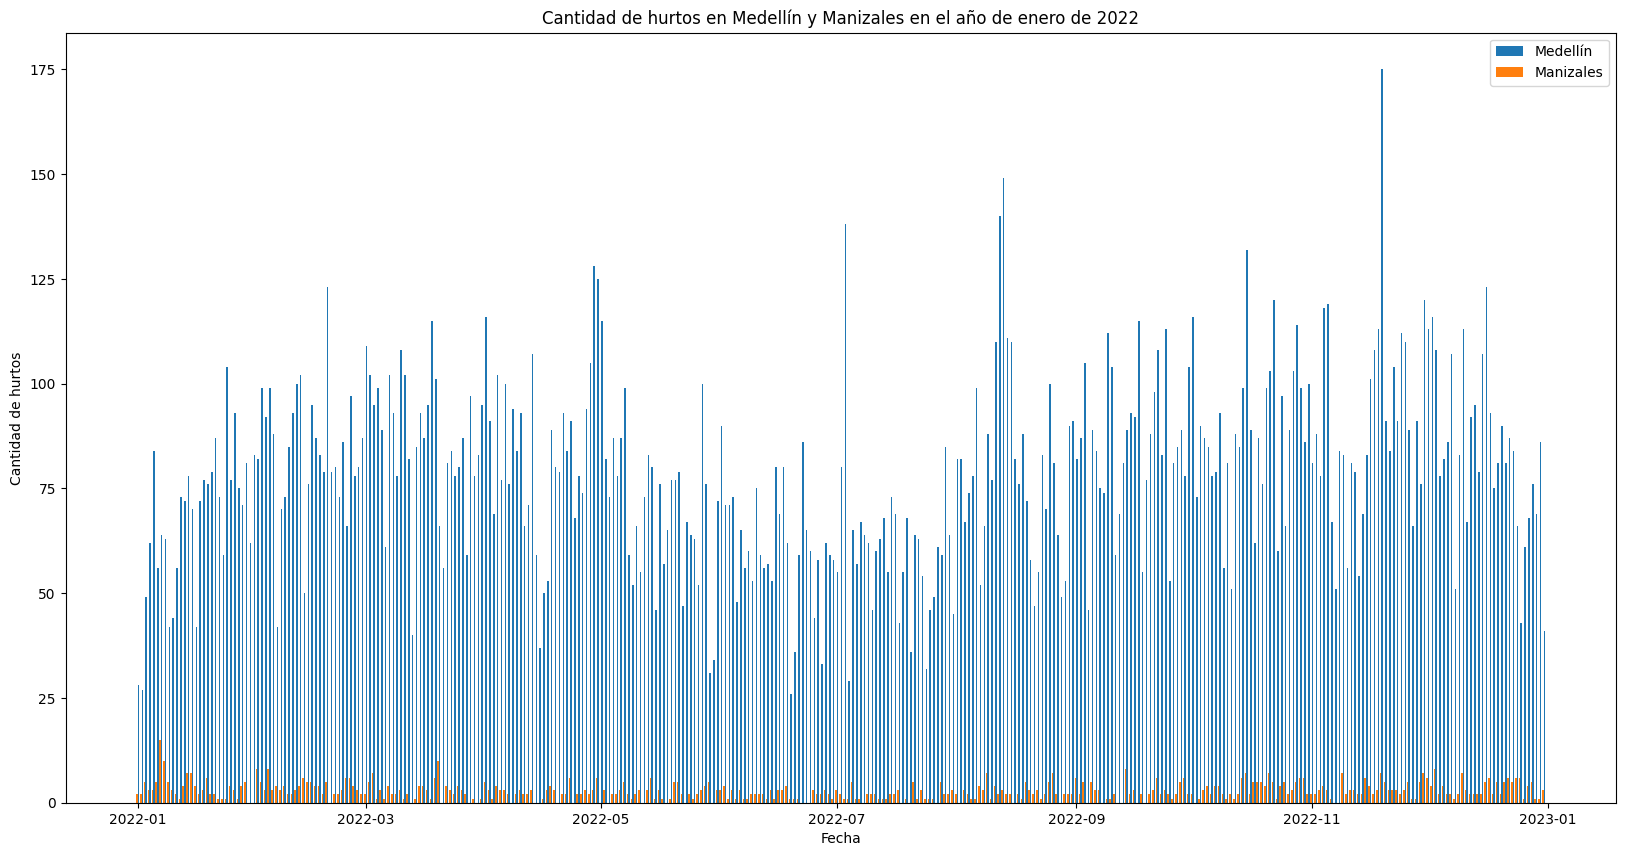

In [25]:
plt.figure(figsize=(20,10))
plt.bar(hurtos_2022_medellin["fecha_hecho"],
        hurtos_2022_medellin["cantidad"],
        width=0.4,
        align="edge",
        label="Medellín")
plt.bar(hurtos_2022_manizales["fecha_hecho"],
        hurtos_2022_manizales["cantidad"],
        width=-0.4,
        align="edge",
        label="Manizales")
plt.title("Cantidad de hurtos en Medellín y Manizales en el año de enero de 2022")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de hurtos")
plt.legend()